In [7]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nltk.download(['stopwords','vader_lexicon'])

stopWords = set(stopwords.words("english"))

def preprocess(s):
    processed_wordlist = []
    # Convert string to lowercase
    s = s.lower()
    wordlist = s.split()
    for word in wordlist:
        # Avoid processing stop words
        if word not in stopWords:
            # Remove symbols
            word = re.sub(r'[^\w]', " ", word)
            processed_words = word.split()
            for w in processed_words:
                # Not adding words with only one alphabet
                if len(w) > 1:
                    processed_wordlist.append(w)
    return processed_wordlist

def word_frequency(wordlist):
    # Count the number of appearances for each word
    wordfreq = []
    for w in wordlist:
        wordfreq.append(wordlist.count(w))

    result = list(zip(wordlist, wordfreq))
    # Remove duplicates
    result = list(dict.fromkeys(result))
    # Sort the list
    result = sorted(result, key=lambda x:x[1], reverse=True)
    return result

[nltk_data] Downloading package stopwords to C:\Users\Chang
[nltk_data]     Kiat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Chang
[nltk_data]     Kiat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


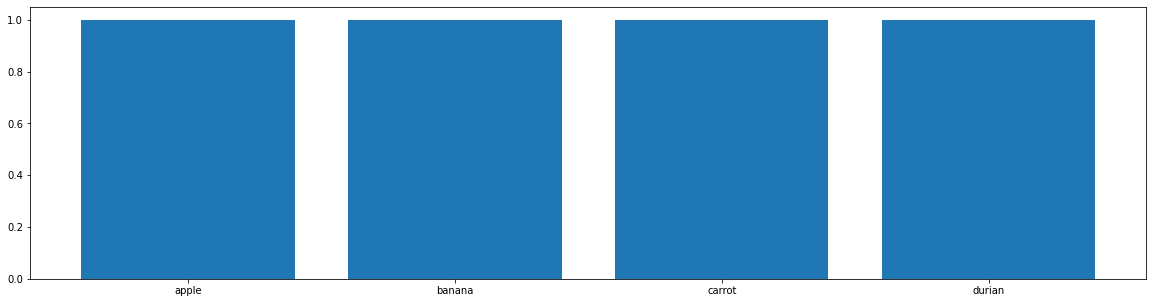

--------------------------------------------------------
Words which are missing in text2
--------------------------------------------------------
('banana', 1)
('durian', 1)
--------------------------------------------------------
Similarity between text1 and text2: 50.0%
Sentiment Analysis on text2: Postive - 0.0%, Negative - 0.0%, Neutral - 100.0%
--------------------------------------------------------


In [8]:
text1 = """
Apple Banana Carrot Durian
"""

text2 = """
Apple Carrot
"""

# Determine word frequencies
text1_result = word_frequency(preprocess(text1))
text1_words, text1_word_count = zip(*text1_result)
text1_result_count = len(text1_result)
text2_result = word_frequency(preprocess(text2))
text2_words, text2_word_count = zip(*text2_result)

# Show graph for top 10 words in terms of frequency
plt.rcParams["figure.figsize"]=(20, 5)
plt.bar(
    text1_words[:10],
    text1_word_count[:10]
)
plt.show()

# Stemming
text2_stem_list = []
ps = PorterStemmer()
for w in text2_words:
    text2_stem_list.append(ps.stem(w))

# Filter away words which appear in text2
filtered_text1_result = [word for word in text1_result if not word[0] in text2_words]
# Remove words with the same stem
words_to_remove = []
for w in filtered_text1_result:
    if ps.stem(w[0]) in text2_stem_list:
        words_to_remove.append(w[0])
filtered_base_result = [word for word in filtered_text1_result if not word[0] in words_to_remove]
similarity = (1 - (len(filtered_text1_result) / text1_result_count)) * 100

# Sentiment Analysis
sa = SentimentIntensityAnalyzer()
sa_result = sa.polarity_scores(text2)

# Print Information
print("--------------------------------------------------------")
print("Words which are missing in text2")
print("--------------------------------------------------------")
print(*sorted(filtered_base_result, key=lambda x:x[1], reverse=True), sep='\n')
print("--------------------------------------------------------")
print("Similarity between text1 and text2: " + str(round(similarity,2)) + "%")
print("Sentiment Analysis on text2: Postive - {0}%, Negative - {1}%, Neutral - {2}%".format(str(sa_result["pos"] * 100), str(sa_result["neg"] * 100), str(sa_result["neu"] * 100)))
print("--------------------------------------------------------")